In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import ConvLSTM2D

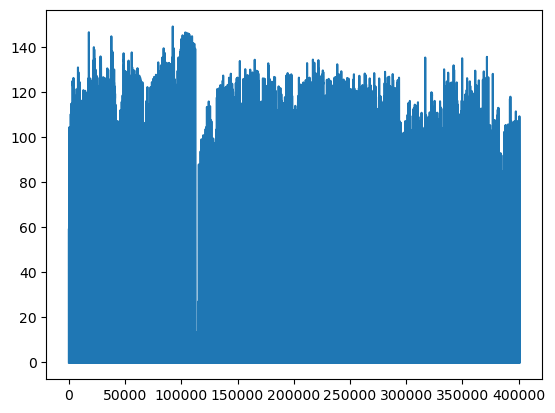

In [3]:
dataframe = pd.read_csv('output2.csv', usecols=[1])
dataframe = dataframe.iloc[:,0:2]
dataframe = dataframe.clip(lower=0)
plt.plot(dataframe)


In [4]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [13]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)

In [19]:
train_size = int(len(dataset)*0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:],dataset[train_size:len(dataset):]

In [15]:
def to_sequences(dataset,seq_size=1):
    x = []
    y = []
    
    for i in range(len(dataset) - seq_size-1):
        window = dataset[i : (i + seq_size) , 0]
        x.append(window)
        y.append(dataset[i+seq_size,0])
        
    return np.array(x),np.array(y)

In [16]:
seq_size = 10

trainX, trainY = to_sequences(train,seq_size)
testX, testY = to_sequences(test,seq_size)

In [18]:
print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))

Shape of training set: (320789, 10)
Shape of test set: (80189, 10)


In [20]:
trainX = trainX.reshape((train.shape[0],1 ,1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

ValueError: cannot reshape array of size 3207890 into shape (320800,1,1,1,10)